In [1]:
meteorites_unwtd <- read.csv("data/results/meteorites_unweighted.csv")
meteorites_unwtd <- subset(meteorites_unwtd, select = -c(X) )
meteorites_unwtd <- subset(meteorites_unwtd, select = -c(id, year))
head(meteorites_unwtd)

recclass,mass,fell_found,latitude,longitude,group,chondrite,type,lvl3,lvl4,lc_sample,weights
L5,21,Fell,50.77500,6.08333,L,Chondrite,Stony,Ordinary,L,11,0.00000000
H6,720,Fell,56.18333,10.23333,H,Chondrite,Stony,Ordinary,H,1,0.02949758
H5,331,Found,26.80000,-105.41667,H,Chondrite,Stony,Ordinary,H,2,0.06434506
H3-6,21100,Found,36.30000,-104.28333,H,Chondrite,Stony,Ordinary,H,13,0.01662856
EH4,107000,Fell,54.21667,-113.00000,EH,Chondrite,Stony,Enstatite,EH-EL,1,0.02949758
L6,2914,Found,33.85000,-101.80000,L,Chondrite,Stony,Ordinary,L,1,0.02949758


In [2]:
#dummy variables

library(fastDummies)

meteorites_unwtd <- dummy_cols(meteorites_unwtd, select_columns = c('fell_found', 'group', 'chondrite','type','lc_sample'))
meteorites_unwtd <- subset(meteorites_unwtd, select = -c(fell_found, group, chondrite,type,lc_sample, recclass, chondrite, type, fell_found, lvl3, lvl4, weights) )

str(meteorites_unwtd)






ERROR: Error in library(fastDummies): there is no package called 'fastDummies'


In [62]:
#Dimensionality Reduction....

#Split into Train and Test

library(caTools)

set.seed(1234)

split = sample.split(meteorites_unwtd$mass, SplitRatio = 0.7)

meteorite_train_data = subset(meteorites_unwtd, split == TRUE)
meteorite_test_data = subset(meteorites_unwtd, split == FALSE)

nrow(meteorite_train_data)
nrow(meteorite_test_data)

[1] 6959

[1] 2938

In [63]:
head(meteorite_train_data)
summary(meteorite_train_data)

,mass,latitude,longitude,fell_found_Fell,fell_found_Found,group_Acapulcoite,group_Achondrite,group_Angrite,group_Aubrite,group_Brachinite,⋯,lc_sample_8,lc_sample_9,lc_sample_10,lc_sample_12,lc_sample_13,lc_sample_14,lc_sample_15,lc_sample_16,lc_sample_17,lc_sample_18
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,334.0,-13.01667,34.20000,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,7000.0,47.75000,16.23333,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,9600.0,-35.98333,145.58333,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,25000.0,54.13667,-0.41333,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7,71.1,34.08333,-103.50000,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8,695.0,34.71667,137.78333,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


      mass             latitude        longitude       fell_found_Fell 
 Min.   :       0   Min.   :-57.79   Min.   :-163.17   Min.   :0.0000  
 1st Qu.:     367   1st Qu.: 11.98   1st Qu.: -97.37   1st Qu.:0.0000  
 Median :    2270   Median : 33.12   Median :  12.22   Median :0.0000  
 Mean   :   91640   Mean   : 22.55   Mean   :   3.50   Mean   :0.3933  
 3rd Qu.:   10820   3rd Qu.: 41.77   3rd Qu.:  79.75   3rd Qu.:1.0000  
 Max.   :60000000   Max.   : 66.35   Max.   : 178.08   Max.   :1.0000  
                                                                       
 fell_found_Found group_Acapulcoite  group_Achondrite    group_Angrite      
 Min.   :0.0000   Min.   :0.000000   Min.   :0.0000000   Min.   :0.0000000  
 1st Qu.:0.0000   1st Qu.:0.000000   1st Qu.:0.0000000   1st Qu.:0.0000000  
 Median :1.0000   Median :0.000000   Median :0.0000000   Median :0.0000000  
 Mean   :0.6067   Mean   :0.005892   Mean   :0.0004311   Mean   :0.0008622  
 3rd Qu.:1.0000   3rd Qu.:0.000000   3r

In [64]:
standard_vars <- as.data.frame(scale(meteorite_train_data[!sapply(meteorite_train_data,class) %in% c('factor')]))

dim(standard_vars)
head(standard_vars)

[1] 6959   76

,mass,latitude,longitude,fell_found_Fell,fell_found_Found,group_Acapulcoite,group_Achondrite,group_Angrite,group_Aubrite,group_Brachinite,⋯,lc_sample_8,lc_sample_9,lc_sample_10,lc_sample_12,lc_sample_13,lc_sample_14,lc_sample_15,lc_sample_16,lc_sample_17,lc_sample_18
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.05857765,-1.2150641,0.33415945,-0.8050949,0.8050949,-0.07697868,-0.02076585,-0.02937368,-0.04800154,-0.01198744,⋯,-0.1176365,-0.01695402,-0.04155859,-0.01198744,-0.1684307,-0.2582001,-0.01198744,-0.06579519,-0.02937368,-0.02398006
3,-0.05430107,0.8611406,0.13859745,1.2419111,-1.2419111,-0.07697868,-0.02076585,-0.02937368,-0.04800154,-0.01198744,⋯,-0.1176365,-0.01695402,-0.04155859,-0.01198744,-0.1684307,-0.2582001,-0.01198744,-0.06579519,-0.02937368,-0.02398006
4,-0.05263304,-1.9997622,1.54653469,-0.8050949,0.8050949,-0.07697868,-0.02076585,-0.02937368,-0.04800154,-0.01198744,⋯,-0.1176365,-0.01695402,-0.04155859,-0.01198744,-0.1684307,-0.2582001,-0.01198744,-0.06579519,-0.02937368,-0.02398006
5,-0.04275316,1.0793529,-0.04259661,1.2419111,-1.2419111,-0.07697868,-0.02076585,-0.02937368,-0.04800154,-0.01198744,⋯,-0.1176365,-0.01695402,-0.04155859,-0.01198744,-0.1684307,-0.2582001,-0.01198744,-0.06579519,-0.02937368,-0.02398006
7,-0.05874632,0.3941938,-1.16466512,-0.8050949,0.8050949,-0.07697868,-0.02076585,-0.02937368,-0.04800154,-0.01198744,⋯,-0.1176365,-0.01695402,-0.04155859,-0.01198744,-0.1684307,-0.2582001,-0.01198744,-0.06579519,-0.02937368,-0.02398006
8,-0.05834605,0.4158330,1.46163395,1.2419111,-1.2419111,-0.07697868,-0.02076585,-0.02937368,-0.04800154,-0.01198744,⋯,-0.1176365,-0.01695402,-0.04155859,-0.01198744,-0.1684307,-0.2582001,-0.01198744,-0.06579519,-0.02937368,-0.02398006


In [66]:
prcomp(na.omit(standard_vars), center = TRUE, scale = TRUE)


ERROR: Error in prcomp.default(na.omit(standard_vars), center = TRUE, scale = TRUE): cannot rescale a constant/zero column to unit variance


In [67]:
which(apply(na.omit(standard_vars), 2, var)==0)


group_Stony group_Unknown  chondrite_NA       type_NA 
           50            52            57            61

In [68]:
meteorite_train_data <- subset(meteorite_train_data, select = -c(group_Stony,group_Unknown,chondrite_NA,type_NA))



In [92]:
head(meteorite_train_data)
dim(meteorite_train_data)

,mass,latitude,longitude,fell_found_Fell,fell_found_Found,group_Acapulcoite,group_Achondrite,group_Angrite,group_Aubrite,group_Brachinite,⋯,lc_sample_8,lc_sample_9,lc_sample_10,lc_sample_12,lc_sample_13,lc_sample_14,lc_sample_15,lc_sample_16,lc_sample_17,lc_sample_18
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,334.0,-13.01667,34.20000,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,7000.0,47.75000,16.23333,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,9600.0,-35.98333,145.58333,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,25000.0,54.13667,-0.41333,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7,71.1,34.08333,-103.50000,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8,695.0,34.71667,137.78333,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] 6959   72

In [70]:
standard_vars <- as.data.frame(scale(meteorite_train_data[!sapply(meteorite_train_data,class) %in% c('factor')]))

dim(standard_vars)
head(standard_vars)

[1] 6959   72

,mass,latitude,longitude,fell_found_Fell,fell_found_Found,group_Acapulcoite,group_Achondrite,group_Angrite,group_Aubrite,group_Brachinite,⋯,lc_sample_8,lc_sample_9,lc_sample_10,lc_sample_12,lc_sample_13,lc_sample_14,lc_sample_15,lc_sample_16,lc_sample_17,lc_sample_18
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.05857765,-1.2150641,0.33415945,-0.8050949,0.8050949,-0.07697868,-0.02076585,-0.02937368,-0.04800154,-0.01198744,⋯,-0.1176365,-0.01695402,-0.04155859,-0.01198744,-0.1684307,-0.2582001,-0.01198744,-0.06579519,-0.02937368,-0.02398006
3,-0.05430107,0.8611406,0.13859745,1.2419111,-1.2419111,-0.07697868,-0.02076585,-0.02937368,-0.04800154,-0.01198744,⋯,-0.1176365,-0.01695402,-0.04155859,-0.01198744,-0.1684307,-0.2582001,-0.01198744,-0.06579519,-0.02937368,-0.02398006
4,-0.05263304,-1.9997622,1.54653469,-0.8050949,0.8050949,-0.07697868,-0.02076585,-0.02937368,-0.04800154,-0.01198744,⋯,-0.1176365,-0.01695402,-0.04155859,-0.01198744,-0.1684307,-0.2582001,-0.01198744,-0.06579519,-0.02937368,-0.02398006
5,-0.04275316,1.0793529,-0.04259661,1.2419111,-1.2419111,-0.07697868,-0.02076585,-0.02937368,-0.04800154,-0.01198744,⋯,-0.1176365,-0.01695402,-0.04155859,-0.01198744,-0.1684307,-0.2582001,-0.01198744,-0.06579519,-0.02937368,-0.02398006
7,-0.05874632,0.3941938,-1.16466512,-0.8050949,0.8050949,-0.07697868,-0.02076585,-0.02937368,-0.04800154,-0.01198744,⋯,-0.1176365,-0.01695402,-0.04155859,-0.01198744,-0.1684307,-0.2582001,-0.01198744,-0.06579519,-0.02937368,-0.02398006
8,-0.05834605,0.4158330,1.46163395,1.2419111,-1.2419111,-0.07697868,-0.02076585,-0.02937368,-0.04800154,-0.01198744,⋯,-0.1176365,-0.01695402,-0.04155859,-0.01198744,-0.1684307,-0.2582001,-0.01198744,-0.06579519,-0.02937368,-0.02398006


In [71]:
meteorite_train_data_pca <- prcomp(na.omit(standard_vars), center = TRUE, scale = TRUE)

summary(meteorite_train_data_pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.3036 1.59853 1.40162 1.32925 1.21453 1.20557 1.15301
Proportion of Variance 0.0737 0.03549 0.02729 0.02454 0.02049 0.02019 0.01846
Cumulative Proportion  0.0737 0.10919 0.13648 0.16102 0.18150 0.20169 0.22015
                          PC8     PC9    PC10    PC11    PC12    PC13   PC14
Standard deviation     1.1386 1.12647 1.10428 1.09370 1.09019 1.07032 1.0597
Proportion of Variance 0.0180 0.01762 0.01694 0.01661 0.01651 0.01591 0.0156
Cumulative Proportion  0.2382 0.25578 0.27272 0.28933 0.30584 0.32175 0.3373
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     1.05371 1.04425 1.03949 1.03282 1.02826 1.02688 1.01275
Proportion of Variance 0.01542 0.01515 0.01501 0.01482 0.01468 0.01465 0.01425
Cumulative Proportion  0.35277 0.36791 0.38292 0.39774 0.41242 0.42707 0.44131
                          PC22    PC23

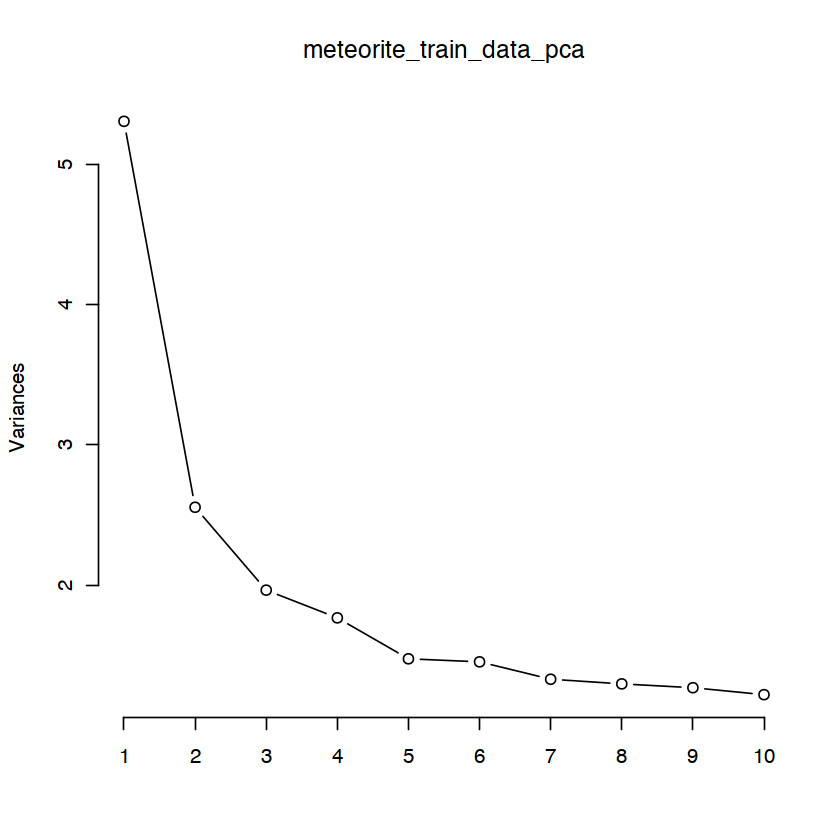

In [72]:
screeplot(meteorite_train_data_pca, type="lines")

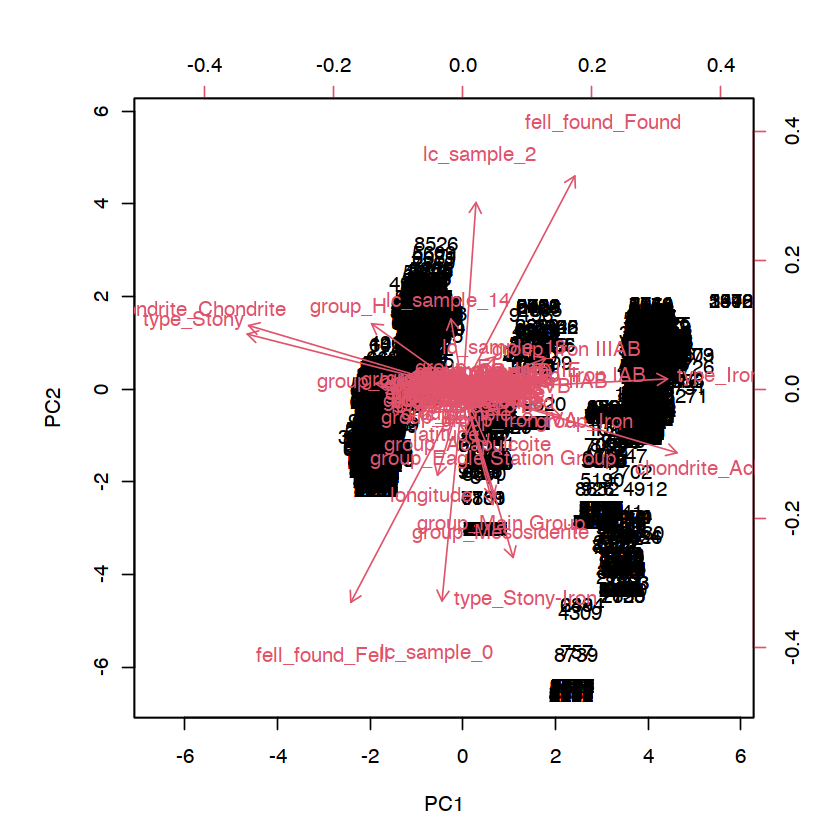

In [73]:
#first 4.

biplot(meteorite_train_data_pca, scale=0)

In [83]:
dim(meteorite_train_data_pca$x)

[1] 6856   72

In [118]:
# PCA analysis...

In [107]:
fit = lm(meteorite_train_data$latitude[1:6856] + meteorite_train_data$longitude[1:6856]  ~ meteorite_train_data_pca$x[,1] + meteorite_train_data_pca$x[,2] + meteorite_train_data_pca$x[,3] + meteorite_train_data_pca$x[,4])
summary(fit)


Call:
lm(formula = meteorite_train_data$latitude[1:6856] + meteorite_train_data$longitude[1:6856] ~ 
    meteorite_train_data_pca$x[, 1] + meteorite_train_data_pca$x[, 
        2] + meteorite_train_data_pca$x[, 3] + meteorite_train_data_pca$x[, 
        4])

Residuals:
    Min      1Q  Median      3Q     Max 
-177.01  -87.43   20.43   68.44  191.39 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      25.9251     1.0051  25.795   <2e-16 ***
meteorite_train_data_pca$x[, 1]   0.1218     0.4363   0.279    0.780    
meteorite_train_data_pca$x[, 2]   0.2282     0.6288   0.363    0.717    
meteorite_train_data_pca$x[, 3]   0.7033     0.7171   0.981    0.327    
meteorite_train_data_pca$x[, 4]   0.9128     0.7562   1.207    0.227    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 83.22 on 6851 degrees of freedom
Multiple R-squared:  0.0003836,	Adjusted R-squared:  -0.0002001 
F-s

In [108]:
fit = lm(meteorite_train_data$mass[1:6856] ~ meteorite_train_data_pca$x[,1] + meteorite_train_data_pca$x[,2] + meteorite_train_data_pca$x[,3] + meteorite_train_data_pca$x[,4])
summary(fit)


Call:
lm(formula = meteorite_train_data$mass[1:6856] ~ meteorite_train_data_pca$x[, 
    1] + meteorite_train_data_pca$x[, 2] + meteorite_train_data_pca$x[, 
    3] + meteorite_train_data_pca$x[, 4])

Residuals:
     Min       1Q   Median       3Q      Max 
 -240482  -107589   -85330   -45608 59912477 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        92206      18963   4.862 1.19e-06 ***
meteorite_train_data_pca$x[, 1]    -8024       8233  -0.975    0.330    
meteorite_train_data_pca$x[, 2]     2628      11864   0.221    0.825    
meteorite_train_data_pca$x[, 3]    21704      13530   1.604    0.109    
meteorite_train_data_pca$x[, 4]     7122      14267   0.499    0.618    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1570000 on 6851 degrees of freedom
Multiple R-squared:  0.0005575,	Adjusted R-squared:  -2.605e-05 
F-statistic: 0.9554 on 4 and 6851 DF,  p-value: 0

In [119]:
#no correlation.  Let's just try individual factors against mass and lat/long

In [120]:
fit = lm(meteorite_train_data$longitude + meteorite_train_data$latitude ~ meteorite_train_data$fell_found_Found)
summary(fit)


Call:
lm(formula = meteorite_train_data$longitude + meteorite_train_data$latitude ~ 
    meteorite_train_data$fell_found_Found)

Residuals:
     Min       1Q   Median       3Q      Max 
-193.855  -69.940   -3.538   70.530  209.541 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                             57.288      1.515   37.82   <2e-16 ***
meteorite_train_data$fell_found_Found  -51.496      1.945  -26.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 79.25 on 6957 degrees of freedom
Multiple R-squared:  0.09155,	Adjusted R-squared:  0.09141 
F-statistic: 701.1 on 1 and 6957 DF,  p-value: < 2.2e-16


In [121]:
fit = lm(meteorite_train_data$longitude + meteorite_train_data$latitude ~ meteorite_train_data$chondrite_Chondrite)
summary(fit)


Call:
lm(formula = meteorite_train_data$longitude + meteorite_train_data$latitude ~ 
    meteorite_train_data$chondrite_Chondrite)

Residuals:
    Min      1Q  Median      3Q     Max 
-164.82  -87.24   17.60   68.00  199.75 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                                15.587      1.885   8.268  < 2e-16
meteorite_train_data$chondrite_Chondrite   12.671      2.221   5.704 1.22e-08
                                            
(Intercept)                              ***
meteorite_train_data$chondrite_Chondrite ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 82.58 on 6854 degrees of freedom
  (103 observations deleted due to missingness)
Multiple R-squared:  0.004724,	Adjusted R-squared:  0.004579 
F-statistic: 32.54 on 1 and 6854 DF,  p-value: 1.219e-08


In [123]:
#There is a significant correlation between geolocation (lat + long) and if a meteorite was found or seen falling.

[1] "mass"                      "latitude"                 
 [3] "longitude"                 "fell_found_Fell"          
 [5] "fell_found_Found"          "group_Acapulcoite"        
 [7] "group_Achondrite"          "group_Angrite"            
 [9] "group_Aubrite"             "group_Brachinite"         
[11] "group_CB"                  "group_Chondrite"          
[13] "group_CI"                  "group_CK"                 
[15] "group_CM"                  "group_CO"                 
[17] "group_CR"                  "group_CV"                 
[19] "group_Diogenite"           "group_Eagle Station Group"
[21] "group_EH"                  "group_EL"                 
[23] "group_Eucrite"             "group_H"                  
[25] "group_H,L, or LL"          "group_Howardite"          
[27] "group_Iron"                "group_Iron IAB"           
[29] "group_Iron IC"             "group_Iron IIAB"          
[31] "group_Iron IIC"            "group_Iron IID"           
[33] "group_Iron IIE"            "group_Iron IIF"           
[35] "group_Iron IIG"            "group_Iron IIIAB"         
[37] "group_Iron IIIE"           "group_Iron IIIF"          
[39] "group_Iron IVA"            "group_Iron IVB"           
[41] "group_Kakangari"           "group_L"                  
[43] "group_LL"                  "group_Lunar"              
[45] "group_Main Group"          "group_Mesosiderite"       
[47] "group_Nakhilite"           "group_Rumuruti"           
[49] "group_Shergottite"         "group_Ungrouped"          
[51] "group_Ureilite"            "group_Winonaite"          
[53] "chondrite_Achondrite"      "chondrite_Chondrite"      
[55] "type_Iron"                 "type_Stony"               
[57] "type_Stony-Iron"           "lc_sample_0"              
[59] "lc_sample_1"               "lc_sample_2"              
[61] "lc_sample_6"               "lc_sample_7"              
[63] "lc_sample_8"               "lc_sample_9"              
[65] "lc_sample_10"              "lc_sample_12"             
[67] "lc_sample_13"              "lc_sample_14"             
[69] "lc_sample_15"              "lc_sample_16"             
[71] "lc_sample_17"              "lc_sample_18"

In [125]:
fit = lm(meteorite_train_data$mass ~ meteorite_train_data$lc_sample_0)
summary(fit)


Call:
lm(formula = meteorite_train_data$mass ~ meteorite_train_data$lc_sample_0)

Residuals:
     Min       1Q   Median       3Q      Max 
 -154630  -152542   -60430   -13541 59845370 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        154630      25233   6.128 9.38e-10 ***
meteorite_train_data$lc_sample_0  -139157      37504  -3.710 0.000209 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1557000 on 6957 degrees of freedom
Multiple R-squared:  0.001975,	Adjusted R-squared:  0.001832 
F-statistic: 13.77 on 1 and 6957 DF,  p-value: 0.0002085


In [126]:
fit = lm(meteorite_train_data$mass ~ meteorite_train_data$lc_sample_1)
summary(fit)


Call:
lm(formula = meteorite_train_data$mass ~ meteorite_train_data$lc_sample_1)

Residuals:
     Min       1Q   Median       3Q      Max 
  -96488   -96113   -93688   -69488 59903512 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         96488      19890   4.851 1.25e-06 ***
meteorite_train_data$lc_sample_1   -41294      58049  -0.711    0.477    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1559000 on 6957 degrees of freedom
Multiple R-squared:  7.273e-05,	Adjusted R-squared:  -7.1e-05 
F-statistic: 0.506 on 1 and 6957 DF,  p-value: 0.4769


In [127]:
fit = lm(meteorite_train_data$mass ~ meteorite_train_data$lc_sample_2)
summary(fit)


Call:
lm(formula = meteorite_train_data$mass ~ meteorite_train_data$lc_sample_2)

Residuals:
     Min       1Q   Median       3Q      Max 
 -215521  -190221   -33777   -29889 59784479 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         34144      22578   1.512    0.131    
meteorite_train_data$lc_sample_2   181377      40100   4.523  6.2e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1557000 on 6957 degrees of freedom
Multiple R-squared:  0.002932,	Adjusted R-squared:  0.002789 
F-statistic: 20.46 on 1 and 6957 DF,  p-value: 6.196e-06


In [128]:
fit = lm(meteorite_train_data$mass ~ meteorite_train_data$lc_sample_6)
summary(fit)


Call:
lm(formula = meteorite_train_data$mass ~ meteorite_train_data$lc_sample_6)

Residuals:
     Min       1Q   Median       3Q      Max 
  -91698   -91331   -89428   -80857 59908302 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         91698      18694   4.905 9.55e-07 ***
meteorite_train_data$lc_sample_6   -67394     636666  -0.106    0.916    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1559000 on 6957 degrees of freedom
Multiple R-squared:  1.611e-06,	Adjusted R-squared:  -0.0001421 
F-statistic: 0.01121 on 1 and 6957 DF,  p-value: 0.9157


In [129]:
fit = lm(meteorite_train_data$mass ~ meteorite_train_data$lc_sample_7)
summary(fit)


Call:
lm(formula = meteorite_train_data$mass ~ meteorite_train_data$lc_sample_7)

Residuals:
     Min       1Q   Median       3Q      Max 
  -91661   -91294   -89391   -80841 59908339 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         91661      18689   4.905 9.58e-07 ***
meteorite_train_data$lc_sample_7   -72528    1102421  -0.066    0.948    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1559000 on 6957 degrees of freedom
Multiple R-squared:  6.221e-07,	Adjusted R-squared:  -0.0001431 
F-statistic: 0.004328 on 1 and 6957 DF,  p-value: 0.9475


In [130]:
fit = lm(meteorite_train_data$mass ~ meteorite_train_data$lc_sample_8)
summary(fit)


Call:
lm(formula = meteorite_train_data$mass ~ meteorite_train_data$lc_sample_8)

Residuals:
     Min       1Q   Median       3Q      Max 
  -92295   -91928   -89890   -80495 59907705 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         92295      18815   4.905 9.54e-07 ***
meteorite_train_data$lc_sample_8   -47930     161035  -0.298    0.766    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1559000 on 6957 degrees of freedom
Multiple R-squared:  1.273e-05,	Adjusted R-squared:  -0.000131 
F-statistic: 0.08859 on 1 and 6957 DF,  p-value: 0.766


In [131]:
fit = lm(meteorite_train_data$mass ~ meteorite_train_data$lc_sample_9)
summary(fit)


Call:
lm(formula = meteorite_train_data$mass ~ meteorite_train_data$lc_sample_9)

Residuals:
     Min       1Q   Median       3Q      Max 
  -91659   -91292   -89389   -80818 59908341 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         91659      18689   4.904 9.58e-07 ***
meteorite_train_data$lc_sample_9   -65009    1102421  -0.059    0.953    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1559000 on 6957 degrees of freedom
Multiple R-squared:  4.998e-07,	Adjusted R-squared:  -0.0001432 
F-statistic: 0.003477 on 1 and 6957 DF,  p-value: 0.953


In [132]:
fit = lm(meteorite_train_data$mass ~ meteorite_train_data$lc_sample_10)
summary(fit)


Call:
lm(formula = meteorite_train_data$mass ~ meteorite_train_data$lc_sample_10)

Residuals:
     Min       1Q   Median       3Q      Max 
  -91667   -91300   -89391   -80622 59908333 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          91667      18703   4.901 9.74e-07 ***
meteorite_train_data$lc_sample_10   -15572     450385  -0.035    0.972    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1559000 on 6957 degrees of freedom
Multiple R-squared:  1.718e-07,	Adjusted R-squared:  -0.0001436 
F-statistic: 0.001195 on 1 and 6957 DF,  p-value: 0.9724


In [133]:
fit = lm(meteorite_train_data$mass ~ meteorite_train_data$lc_sample_12)
summary(fit)


Call:
lm(formula = meteorite_train_data$mass ~ meteorite_train_data$lc_sample_12)

Residuals:
     Min       1Q   Median       3Q      Max 
  -91653   -91286   -89383   -80812 59908347 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          91654      18688   4.904 9.58e-07 ***
meteorite_train_data$lc_sample_12   -91560    1558946  -0.059    0.953    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1559000 on 6957 degrees of freedom
Multiple R-squared:  4.958e-07,	Adjusted R-squared:  -0.0001432 
F-statistic: 0.003449 on 1 and 6957 DF,  p-value: 0.9532


In [134]:
fit = lm(meteorite_train_data$mass ~ meteorite_train_data$lc_sample_13)
summary(fit)


Call:
lm(formula = meteorite_train_data$mass ~ meteorite_train_data$lc_sample_13)

Residuals:
     Min       1Q   Median       3Q      Max 
 -101255   -91027   -89250   -80567 59908633 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          91367      18950   4.822 1.45e-06 ***
meteorite_train_data$lc_sample_13     9890     114084   0.087    0.931    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1559000 on 6957 degrees of freedom
Multiple R-squared:  1.08e-06,	Adjusted R-squared:  -0.0001427 
F-statistic: 0.007516 on 1 and 6957 DF,  p-value: 0.9309


In [135]:
fit = lm(meteorite_train_data$mass ~ meteorite_train_data$lc_sample_14)
summary(fit)


Call:
lm(formula = meteorite_train_data$mass ~ meteorite_train_data$lc_sample_14)

Residuals:
     Min       1Q   Median       3Q      Max 
  -99076   -90824   -89027   -80344 59908856 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          91144      19299   4.723 2.37e-06 ***
meteorite_train_data$lc_sample_14     7934      77192   0.103    0.918    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1559000 on 6957 degrees of freedom
Multiple R-squared:  1.519e-06,	Adjusted R-squared:  -0.0001422 
F-statistic: 0.01057 on 1 and 6957 DF,  p-value: 0.9181


In [136]:
fit = lm(meteorite_train_data$mass ~ meteorite_train_data$lc_sample_15)
summary(fit)


Call:
lm(formula = meteorite_train_data$mass ~ meteorite_train_data$lc_sample_15)

Residuals:
     Min       1Q   Median       3Q      Max 
  -91653   -91286   -89383   -80812 59908347 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          91654      18688   4.904 9.58e-07 ***
meteorite_train_data$lc_sample_15   -91532    1558946  -0.059    0.953    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1559000 on 6957 degrees of freedom
Multiple R-squared:  4.955e-07,	Adjusted R-squared:  -0.0001432 
F-statistic: 0.003447 on 1 and 6957 DF,  p-value: 0.9532


In [137]:
fit = lm(meteorite_train_data$mass ~ meteorite_train_data$lc_sample_16)
summary(fit)


Call:
lm(formula = meteorite_train_data$mass ~ meteorite_train_data$lc_sample_16)

Residuals:
     Min       1Q   Median       3Q      Max 
  -91971   -91604   -89671   -80671 59908029 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          91971      18727   4.911 9.26e-07 ***
meteorite_train_data$lc_sample_16   -76776     285217  -0.269    0.788    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1559000 on 6957 degrees of freedom
Multiple R-squared:  1.042e-05,	Adjusted R-squared:  -0.0001333 
F-statistic: 0.07246 on 1 and 6957 DF,  p-value: 0.7878


In [138]:
fit = lm(meteorite_train_data$mass ~ meteorite_train_data$lc_sample_17)
summary(fit)


Call:
lm(formula = meteorite_train_data$mass ~ meteorite_train_data$lc_sample_17)

Residuals:
     Min       1Q   Median       3Q      Max 
  -91715   -91348   -89445   -80715 59908285 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          91715      18694   4.906 9.51e-07 ***
meteorite_train_data$lc_sample_17   -86793     636665  -0.136    0.892    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1559000 on 6957 degrees of freedom
Multiple R-squared:  2.671e-06,	Adjusted R-squared:  -0.0001411 
F-statistic: 0.01858 on 1 and 6957 DF,  p-value: 0.8916


In [139]:
fit = lm(meteorite_train_data$mass ~ meteorite_train_data$lc_sample_18)
summary(fit)


Call:
lm(formula = meteorite_train_data$mass ~ meteorite_train_data$lc_sample_18)

Residuals:
     Min       1Q   Median       3Q      Max 
  -91684   -91317   -89414   -80843 59908316 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          91684      18692   4.905 9.55e-07 ***
meteorite_train_data$lc_sample_18   -76501     779641  -0.098    0.922    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1559000 on 6957 degrees of freedom
Multiple R-squared:  1.384e-06,	Adjusted R-squared:  -0.0001424 
F-statistic: 0.009628 on 1 and 6957 DF,  p-value: 0.9218


In [ ]:
# Interestingly, there was a significant correlation between mass and if a meteorite was found 
# in landcovers 0 or 2, but no others.  0 = water bodies. 2 = pastureland.